1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



In [1]:
#load the dataset
import numpy as np
import matplotlib.pyplot as plt

max_speeds = np.load('max-speeds.npy') #data of the max wind speed
years_nb = max_speeds.shape[0] #number of years

print(max_speeds)
type(max_speeds)

[28.09 22.46 26.65 26.65 28.79 30.19 26.19 26.75 23.34 24.16 29.75 27.93
 26.68 23.85 32.97 25.79 26.37 25.28 26.73 23.2  26.76]


numpy.ndarray

https://scipy-lectures.org/intro/summary-exercises/auto_examples/plot_cumulative_wind_speed_prediction.html

In [2]:
#cumulative

#calculate year by year pointlike the culumative 
# cumulative prob of year Cp_i =(i/(Nyears+1))
cprob = (np.arange(years_nb) + 1)/(years_nb + 1)
type(cprob)
print(cprob)


#sort the speeds from smaller to bigger
sorted_max_speeds=np.sort(max_speeds)
print("\n sorted speeds \n",sorted_max_speeds)

[0.04545455 0.09090909 0.13636364 0.18181818 0.22727273 0.27272727
 0.31818182 0.36363636 0.40909091 0.45454545 0.5        0.54545455
 0.59090909 0.63636364 0.68181818 0.72727273 0.77272727 0.81818182
 0.86363636 0.90909091 0.95454545]

 sorted speeds 
 [22.46 23.2  23.34 23.85 24.16 25.28 25.79 26.19 26.37 26.65 26.65 26.68
 26.73 26.75 26.76 27.93 28.09 28.79 29.75 30.19 32.97]


Use then the UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html

recall linspace
https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

In [3]:
#we defined before the cumulative as an array of points
#we want to find out a continuous function in order to invert it and find the quantile?
#use Spline to interpolate
from scipy.interpolate import UnivariateSpline

speed_spline = UnivariateSpline(cprob, sorted_max_speeds)
#UnivariateSpline(x,y)
#returns a function y=f(x)
#to evaluate it you must provide a set of x point

#100 equally spaced points between 0 and 1
#to be used as x values where to evaluate the spline
nprob = np.linspace(0, 1, 100)

fitted_max_speeds = speed_spline(nprob)



In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

fifty_prob = 1. - 0.02

So the storm wind speed occurring every 50 years can be guessed as:

fifty_wind = quantile_func(fifty_prob)

In [4]:
#look for the max 2% quantile
fifty_prob = 1. - 0.02

fifty_wind = speed_spline(fifty_prob)

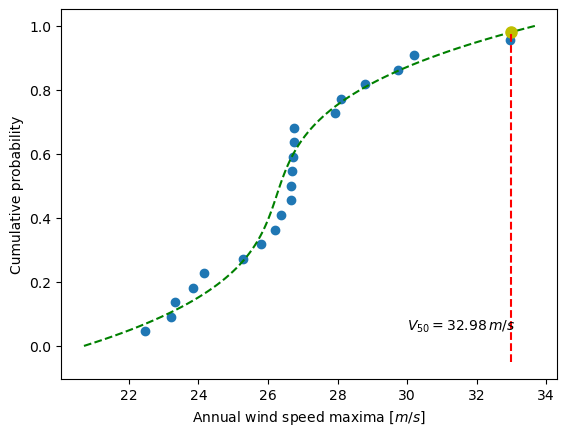

In [5]:
plt.figure()

plt.plot(sorted_max_speeds, cprob, 'o') #point values of speed
plt.plot(fitted_max_speeds, nprob, 'g--') #fit of speeds
plt.xlabel('Annual wind speed maxima [$m/s$]') #label x axis
plt.ylabel('Cumulative probability') #label y axis

plt.plot([fifty_wind], [fifty_prob], 'o', ms=8., mfc='y', mec='y') #plot a single point at x=[fifty_wind], y=[fifty_prob]
plt.text(30, 0.05, '$V_{50} = %.2f \, m/s$' % fifty_wind) #write the value of v_50 on the plot
plt.plot([fifty_wind, fifty_wind], [plt.axis()[2], fifty_prob], 'r--',) #to draw a line from the point to x axis

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

[ 1  2  3  4  5  6  7  8  9 10 11 12]
12 12 12


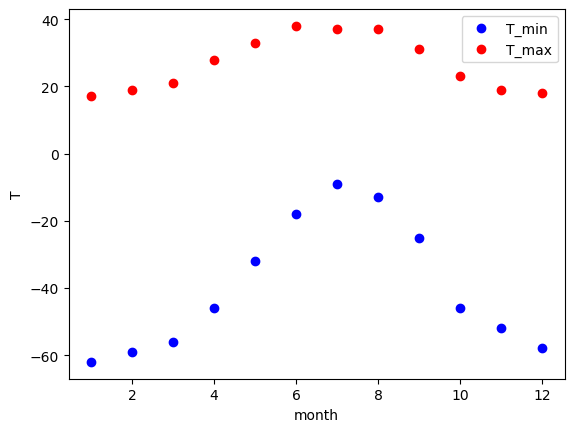

In [6]:
T_max=np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
T_min=np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
month=np.arange(1,13) #values of months (each temperature corresponds to 1 month)
print(month)

print(len(T_max),len(T_min),len(month))

plt.figure()
plt.plot(month, T_min, 'o',color='blue',label='T_min') #point values of (month,T_min)
plt.plot(month, T_max, 'o',color='red',label='T_max') #point values of (month,T_min)

plt.xlabel('month') #label x axis
plt.ylabel('T') #label y axis
plt.legend()

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

to me the distribution looks like a Cauchy curve (since it has heavier tails wrt the Gaussian)

https://www.itl.nist.gov/div898/handbook/eda/section3/eda3663.htm


optimize curve fit

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html


scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(- inf, inf), method=None, jac=None, *, full_output=False, **kwargs)

Use non-linear least squares to fit a function, f, to data.

In [7]:
def Cauchy(x, t,s,t0,A):
    return (t0+A/(s*np.pi*(1+((x-t)/s)**2)))
#t location parameter
#s scale parameter
#t0 initial temperature offset

In [8]:
from scipy import optimize

# fit by means of curve_fit
# p0 are the guessed values for the parameters
params, params_covariance = optimize.curve_fit(Cauchy, month, T_max, p0=[7,1,20,1])
print(params)
print (params_covariance)
# get the full output
optimize.curve_fit(Cauchy, month, T_max, p0=[7,1,20,1], full_output=True)

[  6.73222419   3.52736978   7.51133696 348.83011288]
[[ 9.11432254e-03 -1.54448739e-03  1.26432716e-02 -2.80670262e-01]
 [-1.54448739e-03  2.33809794e-01 -1.42441818e+00  3.55416559e+01]
 [ 1.26432716e-02 -1.42441818e+00  9.80541199e+00 -2.34120711e+02]
 [-2.80670262e-01  3.55416559e+01 -2.34120711e+02  5.72165471e+03]]


(array([  6.73222419,   3.52736978,   7.51133696, 348.83011288]),
 array([[ 9.11432254e-03, -1.54448739e-03,  1.26432716e-02,
         -2.80670262e-01],
        [-1.54448739e-03,  2.33809794e-01, -1.42441818e+00,
          3.55416559e+01],
        [ 1.26432716e-02, -1.42441818e+00,  9.80541199e+00,
         -2.34120711e+02],
        [-2.80670262e-01,  3.55416559e+01, -2.34120711e+02,
          5.72165471e+03]]),
 {'fvec': array([-0.8427698 , -0.24563558,  1.36298799, -0.81429302, -0.12656649,
         -0.31063039,  1.80940253, -1.61132253, -1.21615422,  1.45136702,
          1.28737177, -0.74375749]),
  'nfev': 124,
  'fjac': array([[-1.44094850e+01,  6.31935205e-02,  1.64848310e-02,
          -9.67688661e-02, -3.05068937e-01, -5.44681989e-01,
          -6.08719470e-01, -4.22976191e-01, -1.81882942e-01,
          -2.54180411e-02,  4.73287366e-02,  7.30213993e-02],
         [ 7.20122433e-02,  1.43920563e+01,  2.89675960e-01,
           3.89354344e-01,  4.39837125e-01,  3.16050151e-01,
 

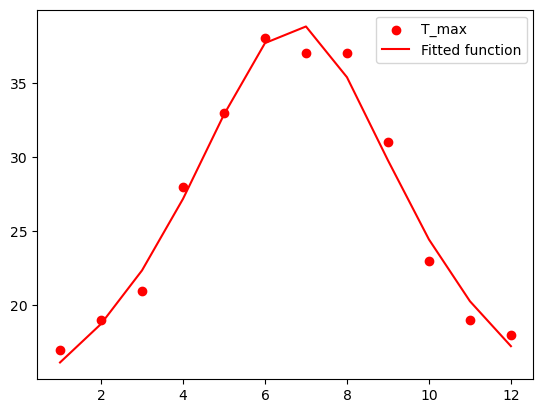

In [9]:
plt.scatter(month, T_max, label='T_max',color='red')
plt.plot(month, Cauchy(month, params[0], params[1],params[2], params[3]),
         label='Fitted function',color='r')

plt.legend(loc='best')

In [10]:
from scipy import optimize

# fit by means of curve_fit
# p0 are the guessed values for the parameters
params2, params_covariance2 = optimize.curve_fit(Cauchy, month, T_min, p0=[6,5,-60,100])
print(params2)
print (params_covariance2)
# get the full output
optimize.curve_fit(Cauchy, month, T_min, p0=[6,5,-60,100], full_output=True)

[  7.16770504   2.72068462 -74.1874087  569.8217132 ]
[[ 3.45888067e-03 -5.87148961e-04  1.12481011e-02 -2.06186133e-01]
 [-5.87148961e-04  4.30434954e-02 -5.26887017e-01  1.16708958e+01]
 [ 1.12481011e-02 -5.26887017e-01  8.07336209e+00 -1.63722730e+02]
 [-2.06186133e-01  1.16708958e+01 -1.63722730e+02  3.50855161e+03]]


(array([  7.16770504,   2.72068462, -74.1874087 , 569.8217132 ]),
 array([[ 3.45888067e-03, -5.87148961e-04,  1.12481011e-02,
         -2.06186133e-01],
        [-5.87148961e-04,  4.30434954e-02, -5.26887017e-01,
          1.16708958e+01],
        [ 1.12481011e-02, -5.26887017e-01,  8.07336209e+00,
         -1.63722730e+02],
        [-2.06186133e-01,  1.16708958e+01, -1.63722730e+02,
          3.50855161e+03]]),
 {'fvec': array([-1.32807704, -0.71902628,  1.73345564,  0.11402951, -1.40775333,
          0.10926144,  1.22724445, -0.22542788, -3.3227597 ,  3.8066809 ,
          0.15340294, -0.14103066]),
  'nfev': 58,
  'fjac': array([[ 3.53659545e+01,  1.23970751e-01,  1.89536920e-01,
           2.90763999e-01,  4.13108254e-01,  4.24104214e-01,
           8.47715640e-02, -3.54460363e-01, -4.41700030e-01,
          -3.32243706e-01, -2.19198459e-01, -1.42590096e-01],
         [-3.25660004e-01, -3.50804847e+01,  6.89381517e-02,
           2.16817263e-02, -1.28239200e-01, -4.40005562e-01,
  

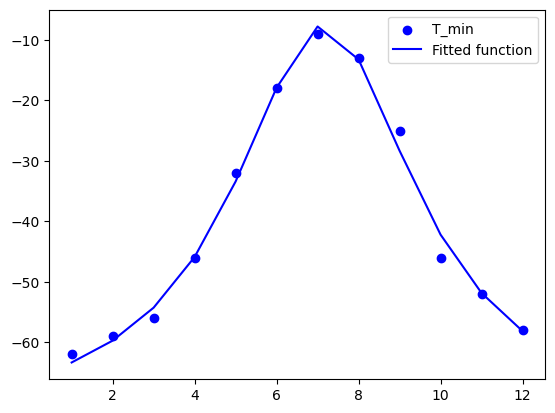

In [11]:
plt.scatter(month, T_min, label='T_min',color='b')
plt.plot(month, Cauchy(month, params2[0], params2[1],params2[2], params2[3]),
         label='Fitted function',color='b')

plt.legend(loc='best')

Is the time offset for min and max temperatures the same within the fit accuracy?

In [12]:
t_min=params2[0]
par_err2=np.sqrt(np.diag(params_covariance2))
print("fit min \n",params2,"\n",par_err2)
err_t_min=par_err2[0]

t_max=params[0]
par_err=np.sqrt(np.diag(params_covariance))
print("\n \n fit max \n",params,"\n",par_err,"\n")
err_t_max=par_err[0]


print(t_min,t_max)
print(err_t_min,err_t_max)

#calculation of the compatibility
L=abs(t_min-t_max)/np.sqrt(err_t_min**2+err_t_max**2)

print("compatibility:",L)

fit min 
 [  7.16770504   2.72068462 -74.1874087  569.8217132 ] 
 [5.88122493e-02 2.07469264e-01 2.84136624e+00 5.92330280e+01]

 
 fit max 
 [  6.73222419   3.52736978   7.51133696 348.83011288] 
 [ 0.09546896  0.48353882  3.13135945 75.64162021] 

7.167705043600735 6.7322241919378
0.05881224934774807 0.09546896111612799
compatibility: 3.8837037663260934


about chi^2.... you cannot directly print out it

https://stackoverflow.com/questions/52591979/how-to-obtain-the-chi-squared-value-as-an-output-of-scipy-optimize-curve-fit


about parameter errors, you can find them
from the diagonal of covmatrix and taking the square root


https://stackoverflow.com/questions/25234996/getting-standard-error-associated-with-parameter-estimates-from-scipy-optimize-c


https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

**just for fun let's compute the chi^2**

https://stackoverflow.com/questions/847936/how-can-i-find-the-number-of-arguments-of-a-python-function

In [13]:
from inspect import signature

def chi2(x,y,F,par):
    
    sig = signature(F)
    params = sig.parameters 
    ndof=len(y)-(len(params)-1)
    print("n_entries:",len(y),"n_params:",(len(params)-1))
    print("ndof:",ndof)
   #for i in par: print(i)

    print((F(x,par[0],par[1],par[2],par[3])))
    print(y)   
    chi=0
    for i in range(len(y)):
        chi+=(y[i]-F(x,par[0],par[1],par[2],par[3])[i])**2/abs(F(x,par[0],par[1],par[2],par[3])[i])
    
    print("chi squared",chi)
    print("Normalised chi squared",chi/ndof)

    return chi,ndof

print("data max \n")
chi2(month,T_max,Cauchy,params)
print("\n data min \n")
chi2(month,T_min,Cauchy,params2)

len(params)

data max 

n_entries: 12 n_params: 4
ndof: 8
[16.1572302  18.75436442 22.36298799 27.18570698 32.87343351 37.68936961
 38.80940253 35.38867747 29.78384578 24.45136702 20.28737177 17.25624251]
[17 19 21 28 33 38 37 37 31 23 19 18]
chi squared 0.5649698758262768
Normalised chi squared 0.0706212344782846

 data min 

n_entries: 12 n_params: 4
ndof: 8
[-63.32807704 -59.71902628 -54.26654436 -45.88597049 -33.40775333
 -17.89073856  -7.77275555 -13.22542788 -28.3227597  -42.1933191
 -51.84659706 -58.14103066]
[-62 -59 -56 -46 -32 -18  -9 -13 -25 -46 -52 -58]
chi squared 1.0838182434360781
Normalised chi squared 0.13547728042950977


4

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


In [14]:
def f(x,y):
    return ((4-2.1*x**2+1/3*x**4)*x**2+x*y+(4*y**2-4)*y**2)

https://matplotlib.org/stable/gallery/mplot3d/surface3d_3.html#sphx-glr-gallery-mplot3d-surface3d-3-py

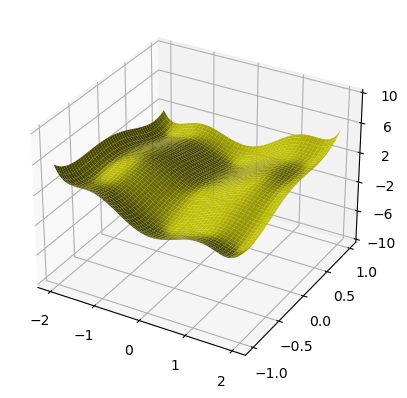

In [15]:
import matplotlib.ticker as ticker

ax = plt.figure().add_subplot(projection='3d')
# Make data.
X = np.arange(-2, 2, 0.01)
xlen = len(X)
Y = np.arange(-1, 1, 0.01)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)



# Create an empty array of strings with the same shape as the meshgrid, and
# populate it with two colors in a checkerboard pattern.
colortuple = ('y', 'b')
colors = np.empty(X.shape, dtype=str)
for y in range(ylen):
    for x in range(xlen):
        colors[y, x] = colortuple[(x + y) % len(colortuple)]

# Plot the surface with face colors taken from the array we made.
surf = ax.plot_surface(X, Y, Z, facecolors=colors, linewidth=0)

# Customize the z axis.
ax.set_zlim(-10, 10)
ax.zaxis.set_major_locator(ticker.LinearLocator(6))

plt.show()


but here some things don't work...

https://stackoverflow.com/questions/51765184/how-to-3d-plot-function-of-2-variables-in-python

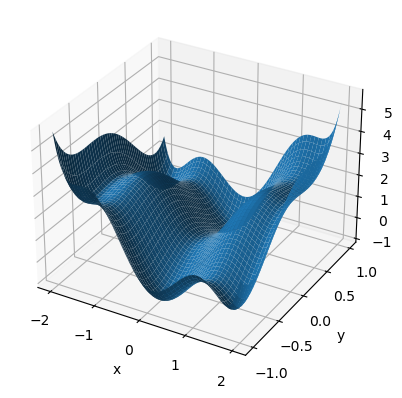

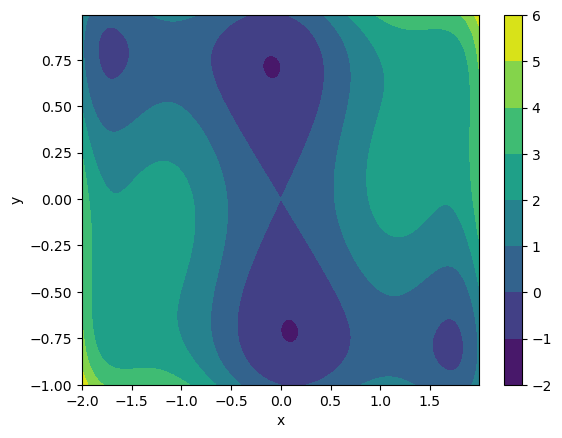

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = np.arange(-2, 2, 0.01)
y = np.arange(-1, 1, 0.01)

X, Y = np.meshgrid(x, y)

def f(x,y):
    return ((4-2.1*x**2+1/3*x**4)*x**2+x*y+(4*y**2-4)*y**2)

Z = f(X,Y)

ax= plt.figure().add_subplot(projection='3d')
ax.plot_surface(X,Y,Z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html


import pylab as plt

https://stackoverflow.com/questions/11775354/how-can-i-display-a-np-array-with-pylab-imshow


https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot

    Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
   

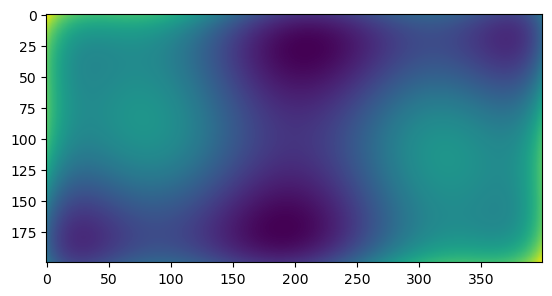

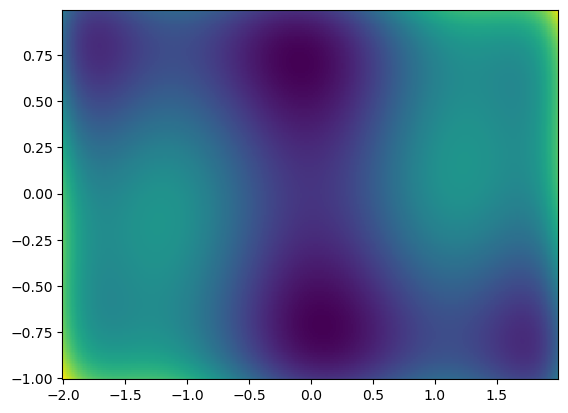

In [17]:
import pylab as pyl

im=pyl.imshow((Z))
#pyl.colorbar(im, orientation='horizontal')
pyl.show()

#print(Z)


#img = plt.imshow(Z)

img2=plt.pcolormesh(X,Y,Z)

useful link for PYLAB imshow

https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_demo.html#sphx-glr-gallery-images-contours-and-fields-image-demo-py

about colors 

https://matplotlib.org/stable/tutorials/colors/colormaps.html

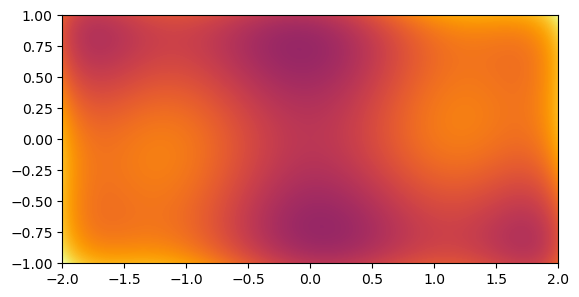

In [18]:
fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', cmap='inferno',
               origin='lower', extent=[-2, 2, -1, 1],
               vmax=abs(Z).max(), vmin=-abs(Z).max())

plt.show()

#areas with darker color stands for the minima 

 Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of (𝑥,𝑦)=(0,0)
?

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

https://stackoverflow.com/questions/13670333/multiple-variables-in-scipys-optimize-minimize

https://www.sfu.ca/~ssurjano/camel6.html

https://scipydirect.readthedocs.io/en/latest/tutorial.html

**there are 6 minima, of which 2 of them are GLOBAL, the other 4 are LOCAL**

In [19]:
from scipy import optimize


def f(par):
    x,y=par
    return ((4-2.1*x**2+1/3*x**4)*x**2+x*y+(4*y**2-4)*y**2)


x0=[0.1,-0.5] #initial guess x0,y0
result=optimize.minimize(f, x0)#, args=(), method=None,bounds=None, constraints=(), options=None)

if result.success:
    fitted_params = result.x
    print("x_min,y_min",fitted_params,"f(x_min,y_min)",f(fitted_params))
else:
    raise ValueError(result.message)
    
    

    

x_min,y_min [ 0.08984201 -0.71265641] f(x_min,y_min) -1.0316284534898768


In [20]:
x0=[0.1,0.75] #initial guess x0,y0
result=optimize.minimize(f, x0)#, args=(), method=None,bounds=None, constraints=(), options=None)
if result.success:
    fitted_params = result.x
    print("x_min,y_min",fitted_params,"f(x_min,y_min)",f(fitted_params))
else:
    raise ValueError(result.message)
    

x0=[-1.8,0.75] #initial guess x0,y0
result=optimize.minimize(f, x0)#, args=(), method=None,bounds=None, constraints=(), options=None)
if result.success:
    fitted_params = result.x
    print("x_min,y_min",fitted_params,"f(x_min,y_min)",f(fitted_params))
else:
    raise ValueError(result.message)    
    
x0=[1.8,-0.8] #initial guess x0,y0
result=optimize.minimize(f, x0)#, args=(), method=None,bounds=None, constraints=(), options=None)
if result.success:
    fitted_params = result.x
    print("x_min,y_min",fitted_params,"f(x_min,y_min)",f(fitted_params))
else:
    raise ValueError(result.message)    

x_min,y_min [-0.08984096  0.71265656] f(x_min,y_min) -1.0316284534852016
x_min,y_min [-1.70360673  0.79608356] f(x_min,y_min) -0.2154638243837136
x_min,y_min [ 1.70360671 -0.7960836 ] f(x_min,y_min) -0.21546382438370826


In [21]:
x0=[-1.72,-0.9] #initial guess x0,y0
result=optimize.minimize(f, x0, bounds=[(-2,-1.3),(-1,-0.3)])#, args=(), method=None,bounds=None, constraints=(), options=None)
if result.success:
    fitted_params = result.x
    print("x_min,y_min",fitted_params,"f(x_min,y_min)",f(fitted_params))
else:
    raise ValueError(result.message)

x_min,y_min [-1.60710478 -0.5686511 ] f(x_min,y_min) 2.104250310311713


In [22]:
x0=[+1.72,+0.9] #initial guess x0,y0
result=optimize.minimize(f, x0, bounds=[(1.3,2),(0.3,1)])#, args=(), method=None,bounds=None, constraints=(), options=None)
if result.success:
    fitted_params = result.x
    print("x_min,y_min",fitted_params,"f(x_min,y_min)",f(fitted_params))
else:
    raise ValueError(result.message)

x_min,y_min [1.60710477 0.5686511 ] f(x_min,y_min) 2.1042503103117376


In [23]:
x0=[0,0] #initial guess x0,y0
result=optimize.minimize(f, x0,method='Nelder-Mead')# it works !!
result=optimize.minimize(f, x0,method='Powell') #it works!!

#result=optimize.minimize(f, x0,method='CG') #not working for (0,0)...
#result=optimize.minimize(f, x0,method='BFGS') #not working for (0,0)...
#result=optimize.minimize(f, x0,method='Newton-CG') #requires the jacobian
#result=optimize.minimize(f, x0,method='L-BFGS-B') #not working for (0,0)...
#result=optimize.minimize(f, x0,method='TNC')#not working for (0,0)...

result=optimize.minimize(f, x0,method='COBYLA') #it works!

#result=optimize.minimize(f, x0,method='SLSQP')  #not working for (0,0)...
#result=optimize.minimize(f, x0,method='trust-constr') #not working for (0,0)...
#result=optimize.minimize(f, x0,method='dogleg') #requires jacobian
#result=optimize.minimize(f, x0,method='trust-ncg') #requires jacobian
#result=optimize.minimize(f, x0,method='trust-exact') #requires jacobian
#result=optimize.minimize(f, x0,method='trust-krylov') #requires jacobian

if result.success:
    fitted_params = result.x
    print("x_min,y_min",fitted_params,"f(x_min,y_min)",f(fitted_params))
else:
    raise ValueError(result.message)
    

x_min,y_min [-0.08982442  0.71254663] f(x_min,y_min) -1.0316283555553818


**Notes on the method**
Depending on the method you can find or not a solution by initialising with (0,0)

Default options

If not given, the method is chosen to be one of BFGS, L-BFGS-B, SLSQP, depending on whether or not the problem has constraints or bounds.

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

In [24]:
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

--2023-01-12 08:53:26--  https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: /s/raw/3vigxoqayo389uc/populations.txt [segue]
--2023-01-12 08:53:27--  https://www.dropbox.com/s/raw/3vigxoqayo389uc/populations.txt
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf5bee5e1f72cd4881c91bb8da6.dl.dropboxusercontent.com/cd/0/inline/B0Y0sAMzfiYCzzCNZ8TJBqFS84Ev-rF67vo1XbdlnoO_PQG3C3_gRvwiFz0-kKorgTPiwoafvCBzMz7WCk4dzQZh4uBIcOcSHKxxmxSQ2icTSEzdBaJgBfPK9vKAE0wC6knb_s3SLqgbxYGFj4ODx8Q7aXQGhFnhIsFgOHFDOFmGSQ/file# [segue]
--2023-01-12 08:53:27--  https://ucf5bee5e1f72cd4881c91bb8da6.dl.dropboxusercontent.com/cd/0/inline/B0Y0sAMzfiYCzzCNZ8TJBqFS84Ev-rF67vo1Xbdlno

In [25]:
import pandas as pd
data=np.loadtxt("populations.txt")
df=pd.DataFrame(data)
df.columns=('year','lynxs','hares','carrots')
df

,year,lynxs,hares,carrots
0,1900.0,30000.0,4000.0,48300.0
1,1901.0,47200.0,6100.0,48200.0
2,1902.0,70200.0,9800.0,41500.0
3,1903.0,77400.0,35200.0,38200.0
4,1904.0,36300.0,59400.0,40600.0
5,1905.0,20600.0,41700.0,39800.0
6,1906.0,18100.0,19000.0,38600.0
7,1907.0,21400.0,13000.0,42300.0
8,1908.0,22000.0,8300.0,44500.0
9,1909.0,25400.0,9100.0,42100.0


In [26]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt

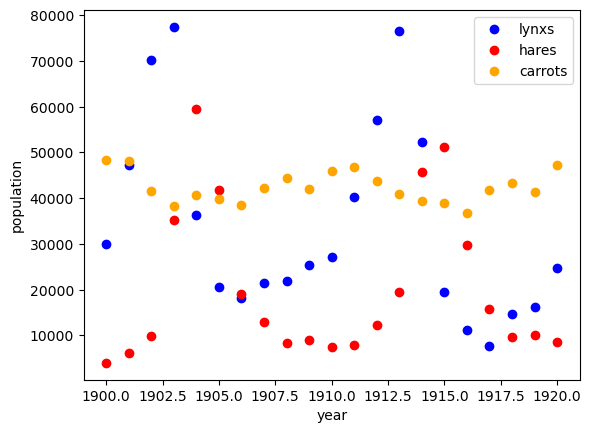

In [27]:
plt.figure()
plt.plot(df.year,df.lynxs, 'o',color='blue',label='lynxs')
plt.plot(df.year, df.hares, 'o',color='red',label='hares') 
plt.plot(df.year, df.carrots, 'o',color='orange',label='carrots') 

plt.xlabel('year') #label x axis
plt.ylabel('population') #label y axis
plt.legend()

you should work with np arrays rather than with pandas series

https://stackoverflow.com/questions/71706387/finding-fft-gives-keyerror-aligned-pandas

10 21


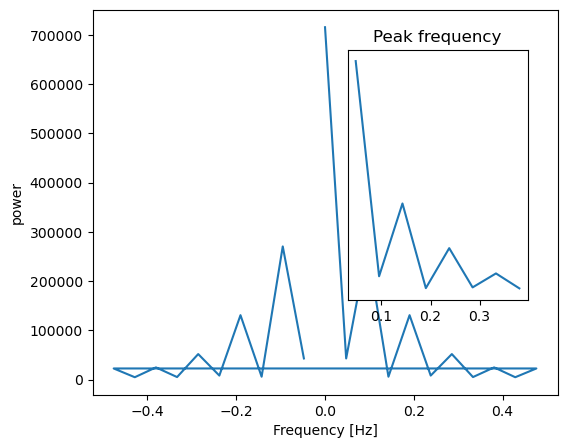

In [28]:
#define the signal, in this case LYNXS
sig=df.lynxs.to_numpy()   #lynxes data

# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

time_step=1 #data each 1 year
period=10 #period of oscillation

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]


# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.setp(axes, yticks=[])
plt.plot(freqs[:8], power[:8])

print(len(freqs),len(power))
#print(power)

/home/fedonv/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


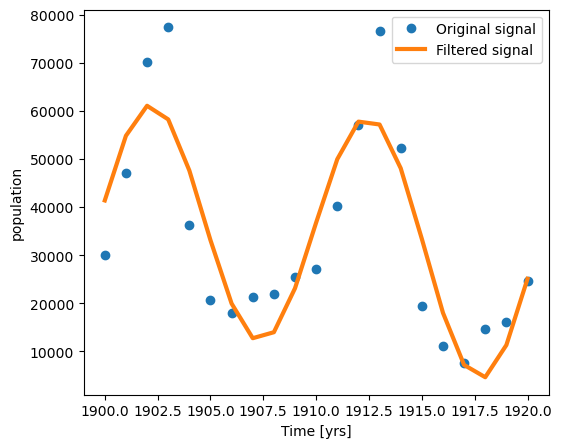

In [29]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(df.year,df.lynxs,'o' ,label='Original signal')
plt.plot(df.year, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [yrs]')
plt.ylabel('population')

plt.legend(loc='best')


10 21


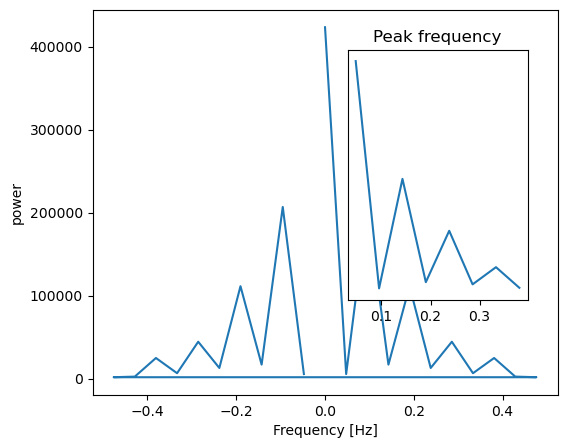

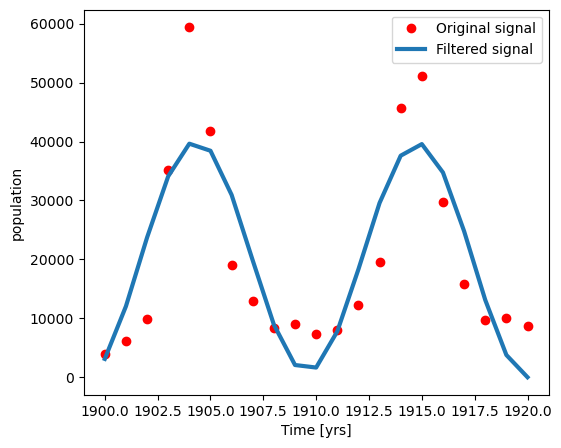

In [30]:
#define the signal, in this case LYNXS
sig=df.hares.to_numpy()   #lynxes data

# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

time_step=1 #data each 1 year
period=10 #period of oscillation

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]


# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.setp(axes, yticks=[])
plt.plot(freqs[:8], power[:8])

print(len(freqs),len(power))
#print(power)

high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(df.year,df.hares,'o',color='red' ,label='Original signal')
plt.plot(df.year, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [yrs]')
plt.ylabel('population')

plt.legend(loc='best')



10 21


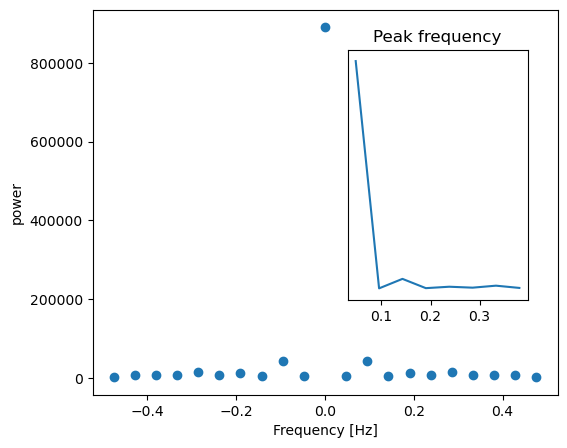

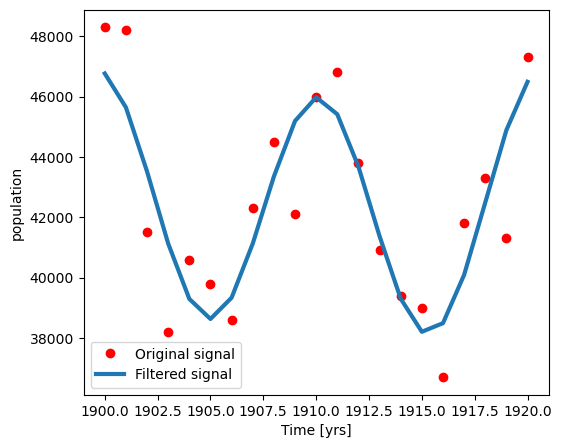

In [31]:
#define the signal, in this case LYNXS
sig=df.carrots.to_numpy()   #lynxes data

# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

time_step=1 #data each 1 year
period=10 #period of oscillation

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power,'o')
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]


# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.setp(axes, yticks=[])
plt.plot(freqs[:8], power[:8])

print(len(freqs),len(power))
#print(power)

high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(df.year,df.carrots,'o',color='red' ,label='Original signal')
plt.plot(df.year, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [yrs]')
plt.ylabel('population')

plt.legend(loc='best')



5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

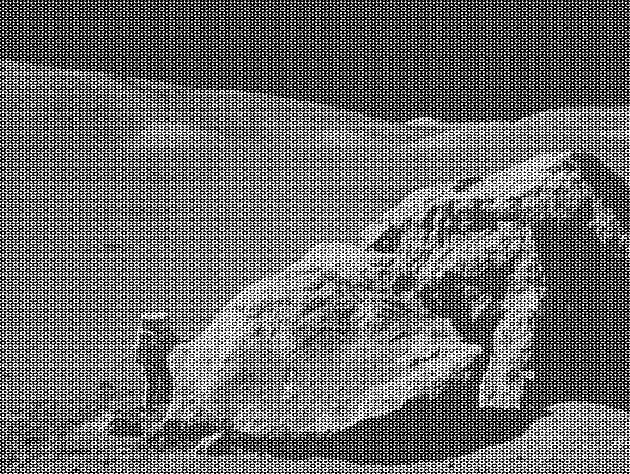

In [32]:
from IPython.display import Image
Image("moonlanding.png")

In [33]:
#Load the image using pylab.imread().

import pylab as pyl
img=pyl.imread("moonlanding.png")

print(type(img),len(img),"\n",img,img.shape)

<class 'numpy.ndarray'> 474 
 [[0.04705882 0.         0.23921569 ... 0.         0.00392157 0.53333336]
 [0.         0.         0.6784314  ... 0.10196079 0.2901961  0.        ]
 [0.72156864 0.10980392 0.6039216  ... 0.         0.21568628 1.        ]
 ...
 [0.00392157 0.         1.         ... 1.         1.         0.95686275]
 [0.         0.         0.15686275 ... 0.         0.         0.3529412 ]
 [1.         0.52156866 0.04705882 ... 0.         0.         1.        ]] (474, 630)


Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?

https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft2.html

**SOLUTION to Troubles in visualising the spectrum**
The scale is not good since you have few strong components (e.g. the 0,0 DC component). Try working in logarithmic scale plt.imshow(np.log10(abs(fft2)))

https://stackoverflow.com/questions/38332642/plot-the-2d-fft-of-an-image

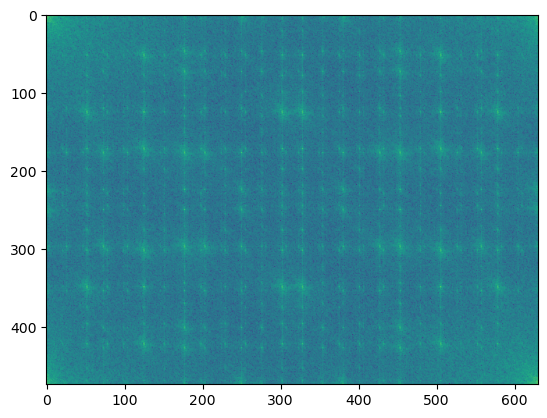

In [34]:
from scipy import fftpack

sig=img #initial signal (from the image)

# The FFT of the signal
sig_fft = fftpack.fft2(sig)

sig_fft.shape


fig, ax = plt.subplots()
im = ax.imshow(1e50*np.log10(abs(sig_fft)))

#Note take abs value since sig_fft are COMPLEX numbers
#take log10 to rescale and see something

plt.show()

The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).

about the 2D frequencies array

https://stackoverflow.com/questions/14582543/extracting-frequencies-from-multidimensional-fft

(474,) (630,)
(474, 630)
(236, 314)
(124, 124)
0.26371308016877637 0.1984126984126984


[]

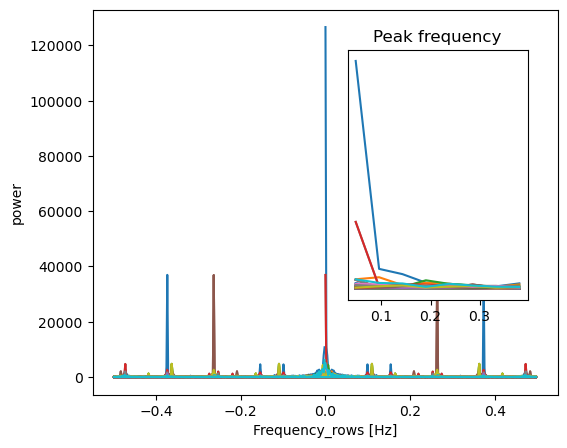

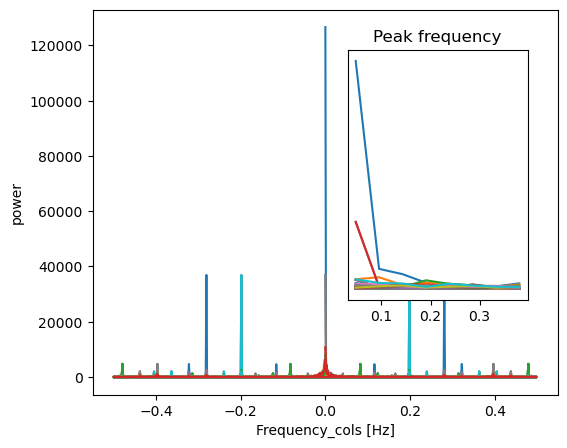

In [35]:
# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft) #just taking the absolute values

# The corresponding frequencies

sample_freq_rows = fftpack.fftfreq(sig_fft.shape[0])
sample_freq_cols = fftpack.fftfreq(sig_fft.shape[1])

print(sample_freq_rows.shape,sample_freq_cols.shape)

print(power.shape)

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask_rows = np.where(sample_freq_rows> 0)

mask_rows=np.flatnonzero(sample_freq_rows> 0) #returns indices with pos freq
mask_cols=np.flatnonzero(sample_freq_cols> 0) #returns indices with pos freq

#print(type(pos_mask_rows))
freqs_rows = sample_freq_rows[pos_mask_rows]

pos_mask_cols = np.where(sample_freq_cols> 0)
freqs_cols = sample_freq_cols[pos_mask_cols]

cleanPower=power[mask_rows,:]
cleanPower=cleanPower[:,mask_cols]
print(cleanPower.shape) #2D array with indices for positive freq

#Indexes of the maximal elements of a N-dimensional array:
ind = np.unravel_index(np.argmax(cleanPower, axis=None), cleanPower.shape)
print(ind)


peak_freq_rows=freqs_rows[ind[0]]
peak_freq_cols=freqs_cols[ind[1]]

print(peak_freq_rows,peak_freq_cols)

peak_freq_rows=0.2


plt.figure(figsize=(6, 5))
plt.plot(sample_freq_rows, power)
plt.xlabel('Frequency_rows [Hz]')
plt.ylabel('power')
# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
freqs_rows = sample_freq_rows[pos_mask_rows]
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])


plt.figure(figsize=(6, 5))
plt.plot(sample_freq_cols, power.T)
plt.xlabel('Frequency_cols [Hz]')
plt.ylabel('power')

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
freqs_cols = sample_freq_cols[pos_mask_cols]
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

#peak_freq = freqs_rows[power[pos_mask_rows][pos_mask_cols].argmax()]

In [36]:
high_freq_fft = sig_fft.copy() #copy the fft of the signal 

#high_freq_fft[np.abs(sample_freq) > peak_freq] = 0  #set to 0 the signals with higher frequency

high_freq_fft[(np.abs(sample_freq_rows) > peak_freq_rows),:] = 0  #set to 0 the signals with higher frequency

high_freq_fft[:,(np.abs(sample_freq_cols) > peak_freq_cols)] = 0  #set to 0 the signals with higher frequency

print(high_freq_fft)


[[126598.46      -0.j        -4608.579  -1892.4691j
    -322.0927   -20.277735j ...   -906.1584 +1539.3083j
    -322.0927   +20.277735j  -4608.579  +1892.4691j  ]
 [ -9421.1    +5242.114j      5224.017  -3171.743j
    1607.9927 +1269.4243j   ...   -677.345   -936.16174j
     354.62457-1003.8347j     1965.366  -2188.0593j  ]
 [ -2928.3508 +7280.916j     -1116.4069 +1338.3181j
    -474.20056 +385.40207j  ...    239.77225 -977.2128j
    1582.9283  -261.9535j     2641.927   -292.0936j  ]
 ...
 [  1850.5717 -2451.1785j     -781.0807   +13.744507j
     377.90704  +12.66983j  ...  -1526.7867 +1271.2621j
   -2705.5718 -3488.5286j     1897.4039 -2281.9092j  ]
 [ -2928.3508 -7280.916j      2641.927   +292.0936j
    1582.9283  +261.9535j   ...  -2208.43     +81.80743j
    -474.20056 -385.40207j   -1116.4069 -1338.3181j  ]
 [ -9421.1    -5242.114j      1965.366  +2188.0593j
     354.62457+1003.8347j   ...   1190.5853 -1431.9934j
    1607.9927 -1269.4243j     5224.017  +3171.743j   ]]


Apply the inverse Fourier transform to see the resulting image.


Inverse fft 2D

https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.ifft2.html

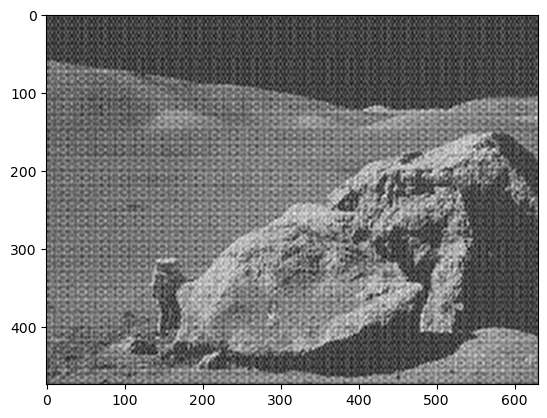

In [37]:
filtered_sig = fftpack.ifft2(high_freq_fft)

fig, ax = plt.subplots()
im = ax.imshow((abs(filtered_sig)),plt.cm.gray)
plt.show()